In [1]:
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")


def extract_barriers_by_type(stats_dict, keyword, barrier_keyword, train=True):
    sub_key = "train_aligned" if train else "test_aligned"
    x = []
    y = []
    keys = [k for k in stats_dict.keys() if keyword in k]
    for k in keys:
        x.append(int(k[len(f"{keyword}-"):]))
        stats = stats_dict[k][sub_key]
        midpoint = np.argmin(np.abs(stats['interpolation'] - 0.5))
        y.append(stats[barrier_keyword][midpoint])
    if "all-aligned" in stats_dict and keyword == "bottom-up":
        x.append(len(x))
        y.append(stats_dict["all-aligned"][sub_key][barrier_keyword][midpoint])
    if "none-aligned" in stats_dict and keyword == "top-down":
        x.append(0)
        y.append(stats_dict["none-aligned"][sub_key][barrier_keyword][midpoint])
        x = [len(x) - i - 1 for i in x]
        x = list(reversed(x))
        y = list(reversed(y))
    return x, y


def plot_barriers_by_perm(ax, stats_dict, barrier_type, is_train):
    linestyle = 'dotted' if is_train else 'solid'
    label = 'train' if  is_train else 'test'
    bx, by = extract_barriers_by_type(stats_dict, 'bottom-up', barrier_type, is_train)
    tx, ty = extract_barriers_by_type(stats_dict, 'top-down', barrier_type, is_train)
    ax.plot(bx, by,
            c='yellowgreen', linestyle=linestyle, alpha=0.5, label=f'{label} bottom-up')
    ax.plot(tx, ty,
            c='seagreen', linestyle=linestyle, linewidth=2, label=f'{label} top-down')
    ax.plot(*extract_barriers_by_type(stats_dict, 'single-layer', barrier_type, is_train),
            c='blueviolet', linestyle=linestyle, linewidth=2, label=f'{label} single-layer')
    ax.plot(*extract_barriers_by_type(stats_dict, 'leave-one-out', barrier_type, is_train),
            c='mediumvioletred', linestyle=linestyle, alpha=0.5, label=f'{label} leave-one-out')
    ax.scatter([bx[-1], tx[-1]], [by[-1], ty[-1]], c='white', edgecolors=['yellowgreen', 'seagreen'], linestyle=linestyle, sizes=[70, 70])  # all-aligned, none-aligned


def plot_barriers(stats_dict):
    barrier_types = ['acc', 'acc_barrier', 'eval_loss', 'loss_barrier']
    fig, axes = plt.subplots(nrows=1, ncols=len(barrier_types), figsize=(6 * len(barrier_types), 4))
    for ax, barrier_type in zip(axes, barrier_types):
        ax.set_title(barrier_type)
        plot_barriers_by_perm(ax, stats_dict, barrier_type, True)
        plot_barriers_by_perm(ax, stats_dict, barrier_type, False)
    plt.legend()
    plt.show()

In [2]:
model_name_to_dir = {
    "cifar_vgg_16_8": "lottery_3d9c91d3d4133cfcdcb2006da1507cbb",
    "cifar_vgg_16_16": "lottery_2915b34d8b29a209ffee2288466cf5f6",
    "cifar_vgg_16_32": "lottery_c855d7c25ffef997a89799dc08931e82",
    "cifar_vgg_16_128": "lottery_8d561a7b273e4d6b2705ba6d627a69bd",
    "cifar_vgg_16_256": "lottery_a309ac4ab15380928661e70ca8b054a1",
}

cifar_vgg_16_16


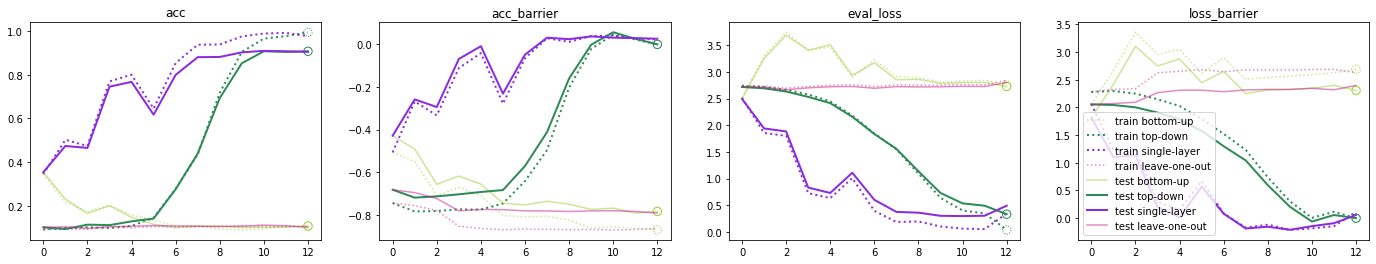

cifar_vgg_16_8


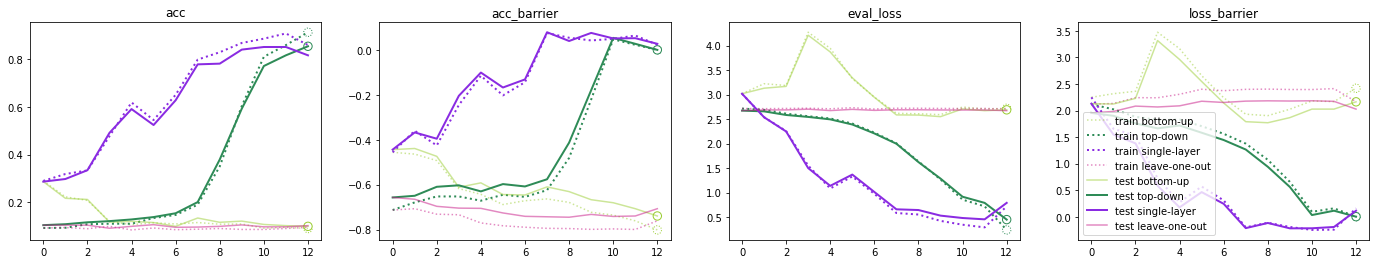

cifar_vgg_16_128


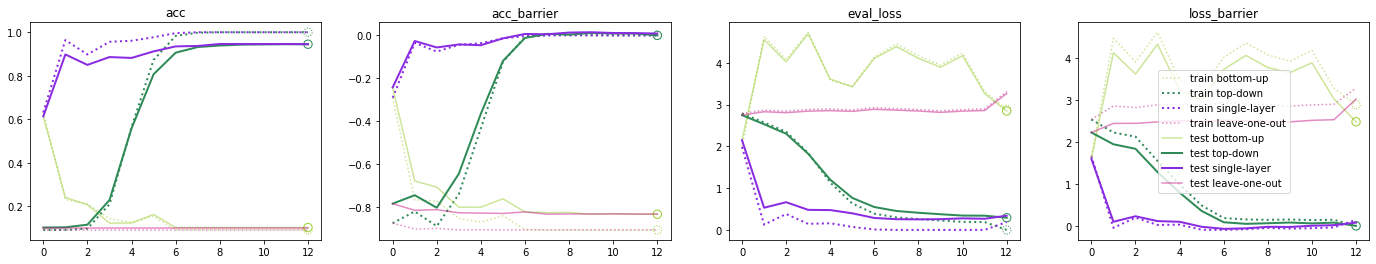

cifar_vgg_16_256


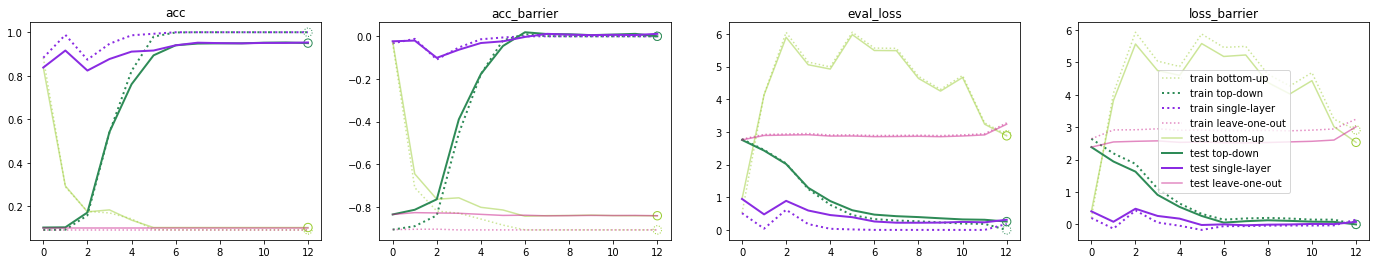

cifar_vgg_16_32


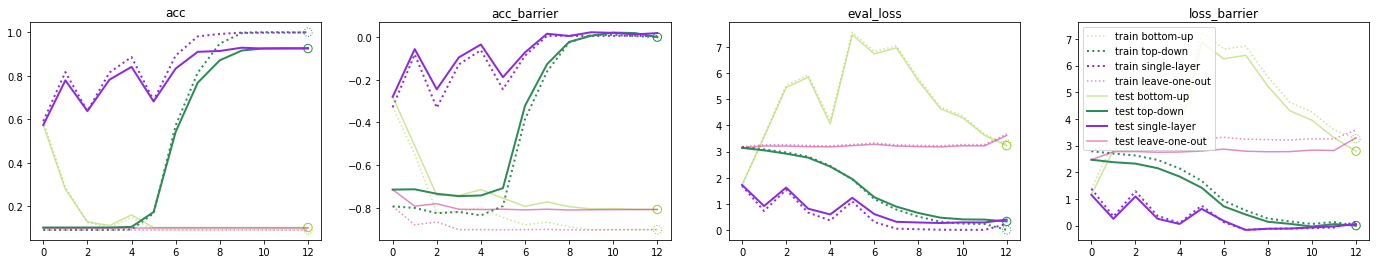

In [3]:
stats_dir = Path("../refactor-outputs/layer-align-random/scratch/open_lth_data/")
for file in stats_dir.glob("*.pt"):
    name = file.stem
    for k, v in model_name_to_dir.items():
        if v in file.stem:
            name = k
    stats_dict = torch.load(file)
    print(name)
    del stats_dict['args']
    del stats_dict['hparams']
    plot_barriers(stats_dict)

cifar_vgg_16_16


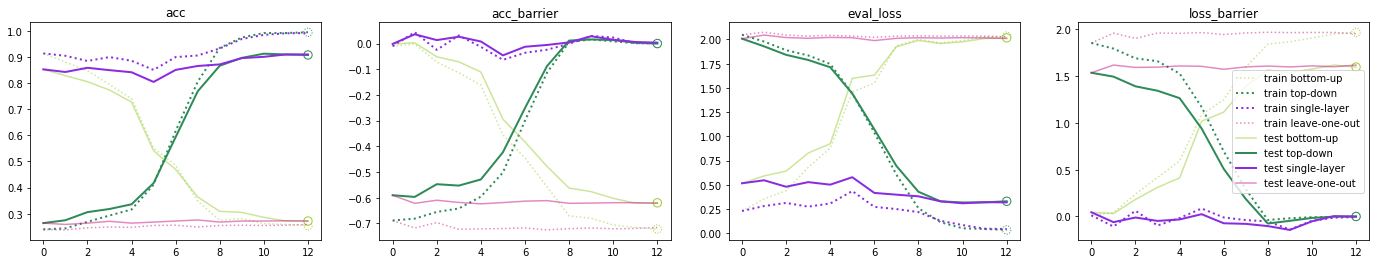

cifar_vgg_16_8


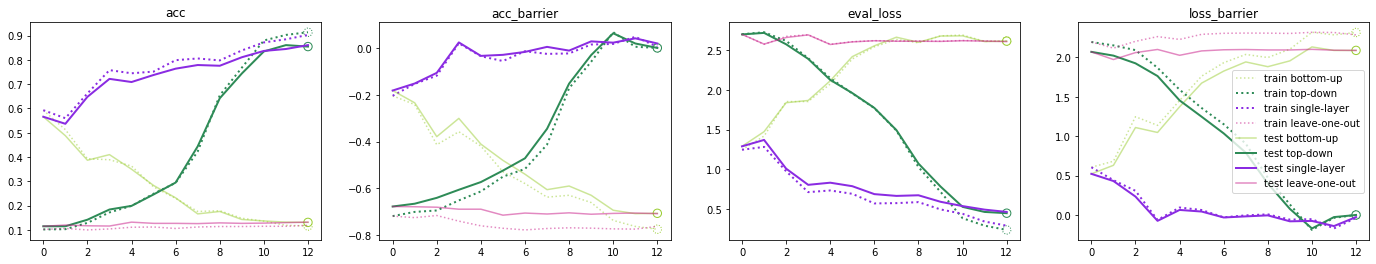

cifar_vgg_16_128


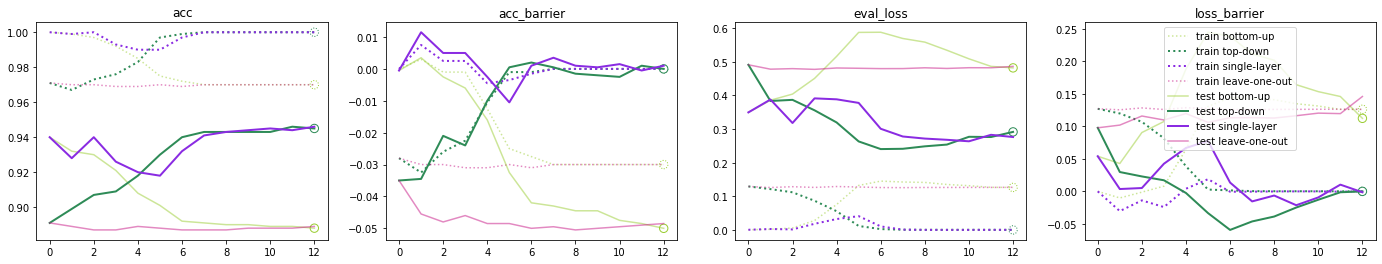

cifar_vgg_16_32


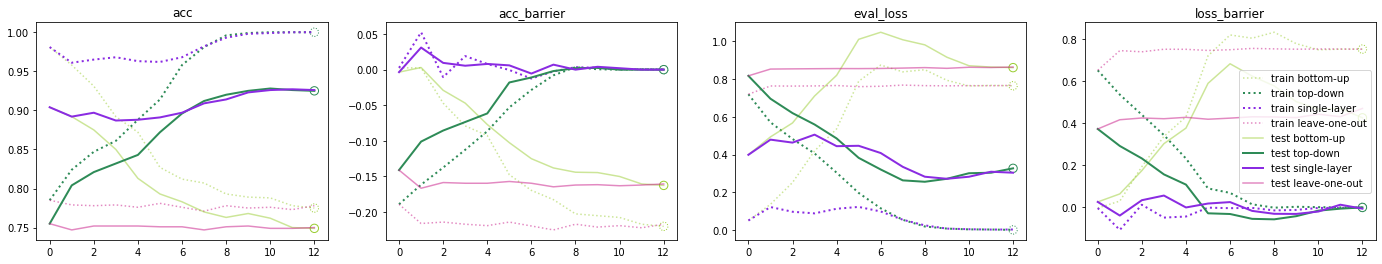

In [5]:
stats_dir = Path("../refactor-outputs/layer-align-match-all/scratch/open_lth_data/")
for file in stats_dir.glob("*.pt"):
    name = file.stem
    for k, v in model_name_to_dir.items():
        if v in file.stem:
            name = k
    stats_dict = torch.load(file)
    print(name)
    del stats_dict['args']
    del stats_dict['hparams']
    plot_barriers(stats_dict)

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_2915b34d8b29a209ffee2288466cf5f6_1_2_pretrain_ep160_linear.pt


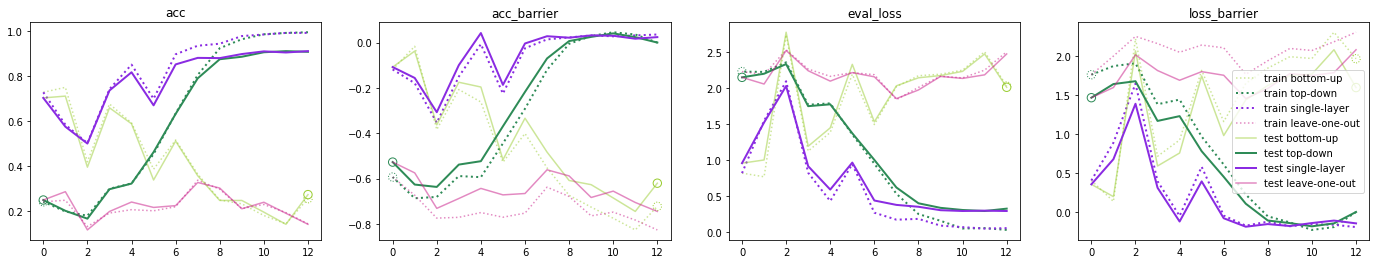

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_3d9c91d3d4133cfcdcb2006da1507cbb_1_2_pretrain_ep160_linear.pt


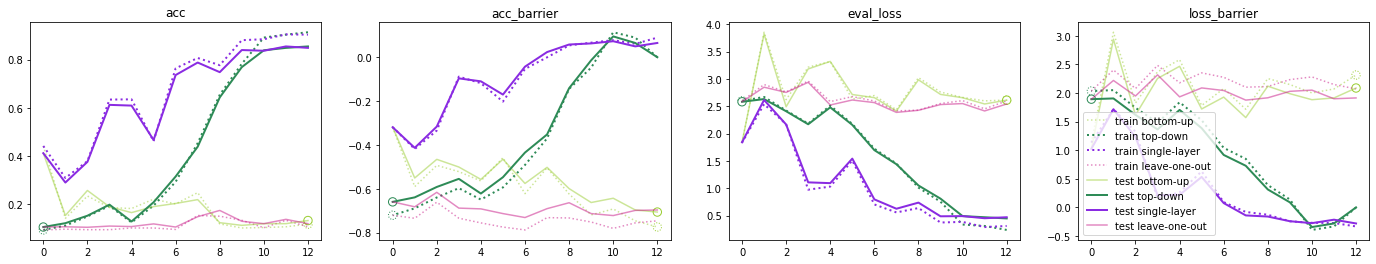

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_8d561a7b273e4d6b2705ba6d627a69bd_1_2_pretrain_ep160_linear.pt


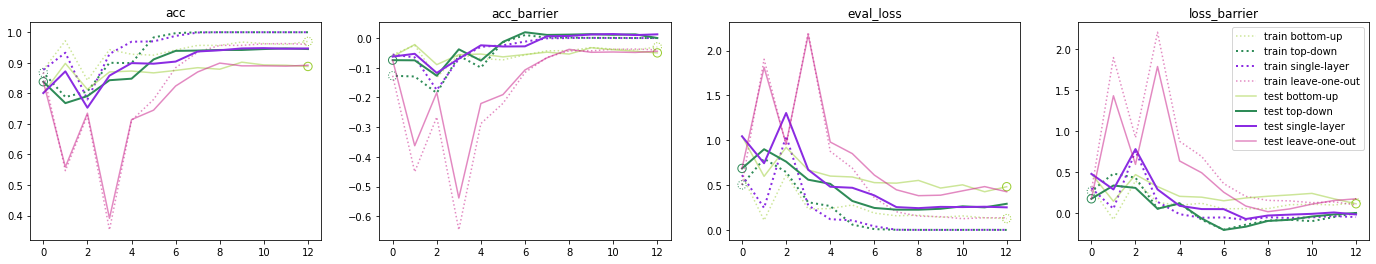

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_a309ac4ab15380928661e70ca8b054a1_1_2_pretrain_ep160_linear.pt


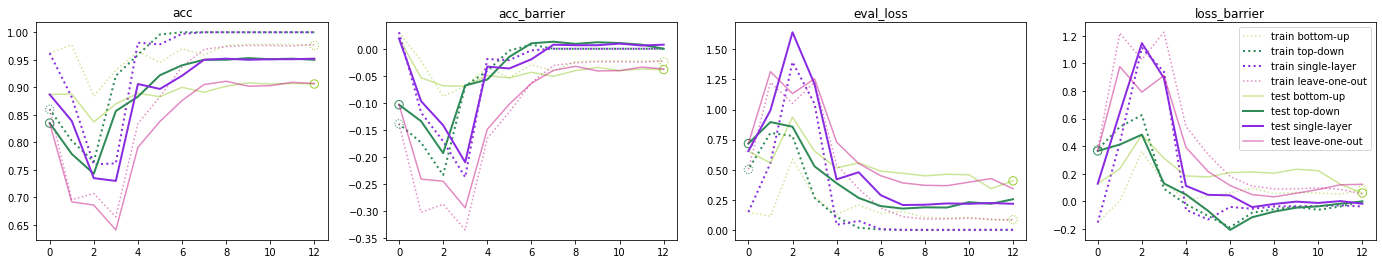

../refactor-outputs/layer-align/scratch/open_lth_data/lottery_c855d7c25ffef997a89799dc08931e82_1_2_pretrain_ep160_linear.pt


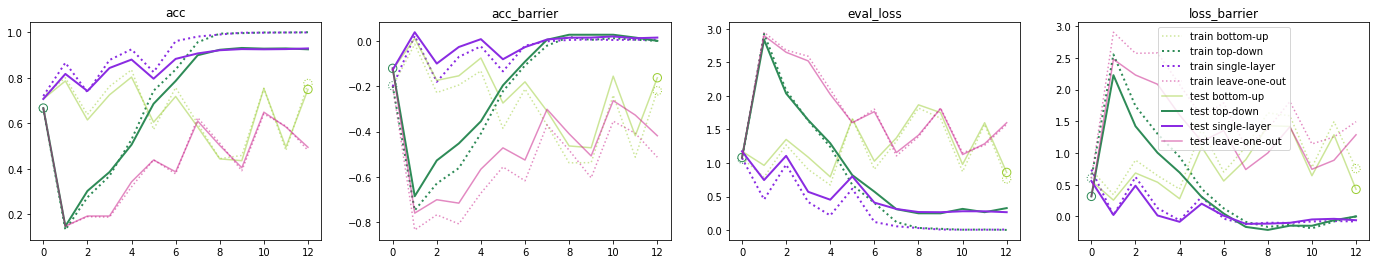

In [93]:
stats_dir = Path("../refactor-outputs/layer-align-only-match-subset/scratch/open_lth_data/")
for file in stats_dir.glob("*.pt"):
# for file in stats_dir.glob("lottery_3d*.pt"):
    stats_dict = torch.load(file)
    print(file)
    del stats_dict['args']
    del stats_dict['hparams']
    plot_barriers(stats_dict)